In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.4129462534109434, 0.6065059003323503],
 'diameter': 61.332771667669334,
 'confidence': 0.9782159924507141,
 'timestamp': 281517.193592,
 'sphere': {'center': [4.299829320188032,
   -2.527751669125326,
   43.65297429696171],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [123.75462108969259, 79.52025697053548],
  'axes': [161.07406048595945, 161.07406048595945],
  'angle': 0.0},
 'circle_3d': {'center': [-1.7684334328354163,
   -2.4774344675937567,
   35.216526268348105],
  'normal': [-0.5839188556619113, 0.004841774974853391, -0.8117975900540583],
  'radius': 3.4302860544942693},
 'diameter_3d': 6.8605721089885385,
 'ellipse': {'center': [79.28568065490113, 75.55086713618874],
  'axes': [50.468928929584955, 61.332771667669334],
  'angle': 4.061336511912984},
 'location': [79.28568065490113, 75.55086713618874],
 'model_confidence': 1.0,
 'theta': 1.5659545329023954,
 'phi': -2.1943524

Text(0.5, 0, 'Pupil timestamp (s)')

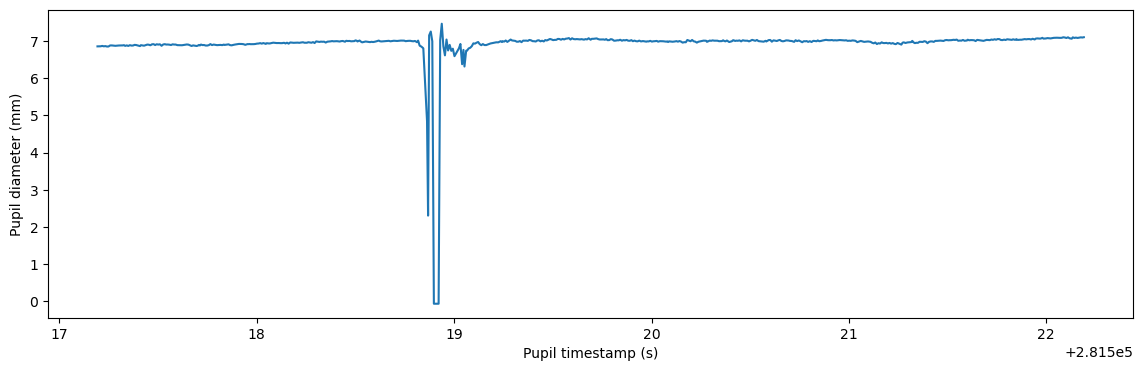

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')